In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Save references to each table
inspector = inspect(engine)
columns = inspector.get_columns("Measurement")
print("    Measurement")
for c in columns:
    print(c['name'])
columns = inspector.get_columns("Station")
print("\n")
print("    Station")
for c in columns:
    print(c['name'])

    Measurement
id
station
date
prcp
tobs


    Station
id
station
name
latitude
longitude
elevation


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data





In [11]:
for c in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    first_date = c
date = [int(x) for x in first_date.split("-")]
first_date = datetime.date(date[0],date[1],date[2])

last_12_month_query = session.query(Measurement.date, Measurement.prcp).\
    filter((Measurement.date)>(datetime.date(date[0],date[1],date[2]) - dt.timedelta(days=365))).order_by(Measurement.date.desc())       #I dont need to sort DF because I use order_by in my query

last_12_df = pd.read_sql(last_12_month_query.statement, session.bind)
x = []
for date in last_12_df['date']:
    x.append(dt.datetime.strptime(date, '%Y-%m-%d').date())
last_12_df['Date Object'] = x
last_12_df = last_12_df.set_index('Date Object')
last_12_df = last_12_df.drop(columns='date')

In [12]:
last_12_df

,prcp
Date Object,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


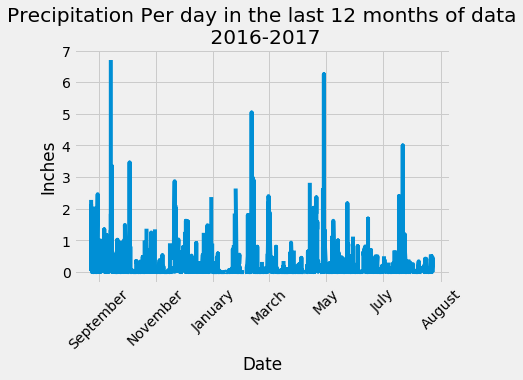

In [13]:
last_12_df.plot()
plt.xticks(rotation=45)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Precipitation Per day in the last 12 months of data\n 2016-2017')
locs, labels = plt.xticks()
plt.xticks(locs, labels=['September', 'November', 'January', 'March', 'May', 'July', 'August'])
legend = plt.legend()
legend.remove()
plt.show()

In [14]:
last_12_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [16]:
# Design a query to show how many stations are available in this dataset?
for c in (session.query(func.count(Station.station))):
    print(c[0])

9


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts=[]
for c in session.query(Station.station,(func.count(Station.station))).filter(Station.station==Measurement.station).group_by(Station.station).order_by(func.count(Station.station).desc()):
    print(c)
    station_counts.append(c)
print(f'Station with most observations: {station_counts[0][0]}\nNumber of observations: {station_counts[0][1]}')

highest_id=station_counts[0][0]

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
Station with most observations: USC00519281
Number of observations: 2772


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
for result in session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station==highest_id).filter(Measurement.date>date):
    print(f"Lowest Temperature is : {result[1]}\nHighest: {result[2]}\nMean: {round(result[3], 2)} \nAt station: {result[0]}")

Lowest Temperature is : 59.0
Highest: 83.0
Mean: 73.09 
At station: USC00519281


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
